In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("X_train shape: ",X_train.shape)
print("Y_train shape ",Y_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_test shape: ",Y_test.shape)

X_train shape:  (60000, 28, 28)
Y_train shape  (60000,)
X_test shape:  (10000, 28, 28)
Y_test shape:  (10000,)


In [5]:
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test,axis=0)

In [6]:
X = X.astype(float)/255.0

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 8)

In [8]:
Y_train = Y_train.reshape(-1,)
Y_test = Y_test.reshape(-1,)

In [9]:
print("X_train shape: ",X_train.shape)
print("Y_train shape ",Y_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_test shape: ",Y_test.shape)

X_train shape:  (49000, 28, 28)
Y_train shape  (49000,)
X_test shape:  (21000, 28, 28)
Y_test shape:  (21000,)


In [10]:
#AutoEncoder Class
class Autoencoder(keras.models.Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = keras.Sequential([
      keras.layers.Flatten(),
      keras.layers.Dense(512),
      keras.layers.LeakyReLU(),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(256),
      keras.layers.LeakyReLU(),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(128),
      keras.layers.LeakyReLU(),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(latent_dim,activation="sigmoid")
    ])
    self.decoder = keras.Sequential([
      keras.layers.Dense(128),
      keras.layers.LeakyReLU(),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(256),
      keras.layers.LeakyReLU(),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(512),
      keras.layers.LeakyReLU(),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(784,activation = "sigmoid"),
      keras.layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [ ]:
latent_dim = 64

In [ ]:
#sdg without momentum
sgd_no_mom = Autoencoder(latent_dim=latent_dim)
sgd_no_mom.compile(optimizer="sgd",loss="binary_crossentropy")

In [ ]:
sgd_no_mom.fit(X_train,X_train,batch_size=32,epochs=15,shuffle=True)

Epoch 1/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.6953
Epoch 2/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.6115
Epoch 3/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.3869
Epoch 4/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.3400
Epoch 5/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.3235
Epoch 6/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.3145
Epoch 7/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.3079
Epoch 8/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.3036
Epoch 9/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.2992
Epoch 10/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.2959
Epoch 11/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.2928
Epoch 12/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.2901
E

In [ ]:
sgd_no_mom.evaluate(X_test,X_test,batch_size=32)

657/657 [==============================] - 1s 2ms/step - loss: 0.2599


0.2599438726902008

In [ ]:
#sgd_with_momentum
sgd_with_mo = Autoencoder(latent_dim=latent_dim)

opm = keras.optimizers.SGD(momentum=0.9)
sgd_with_mo.compile(optimizer=opm,loss="binary_crossentropy")

In [ ]:
sgd_with_mo.fit(X_train,X_train,batch_size=32,epochs=15,shuffle=True)

Epoch 1/15
1532/1532 [==============================] - 8s 3ms/step - loss: 0.4984
Epoch 2/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.2887
Epoch 3/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.2767
Epoch 4/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.2697
Epoch 5/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.2663
Epoch 6/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.2634
Epoch 7/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.2600
Epoch 8/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.2569
Epoch 9/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.2540
Epoch 10/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.2529
Epoch 11/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.2509
Epoch 12/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.2493
E

In [ ]:
sgd_with_mo.evaluate(X_test,X_test,batch_size=32)

657/657 [==============================] - 1s 2ms/step - loss: 0.2362


0.23622730374336243

In [ ]:
#adam 
adam = Autoencoder(latent_dim=latent_dim)
adam.compile(optimizer="adam",loss="binary_crossentropy")

In [ ]:
adam.fit(X_train,X_train,batch_size=32,epochs=15,shuffle=True)

Epoch 1/15
1532/1532 [==============================] - 6s 3ms/step - loss: 0.2497
Epoch 2/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.1891
Epoch 3/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.1843
Epoch 4/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.1818
Epoch 5/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.1810
Epoch 6/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.1803
Epoch 7/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.1805
Epoch 8/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.1802
Epoch 9/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.1800
Epoch 10/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.1799
Epoch 11/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.1799
Epoch 12/15
1532/1532 [==============================] - 5s 3ms/step - loss: 0.1805
E

In [ ]:
adam.evaluate(X_test,X_test,batch_size=32)

657/657 [==============================] - 1s 2ms/step - loss: 0.1554


0.15544165670871735

In [ ]:
#RMSPROP
rmsprop = Autoencoder(latent_dim=latent_dim)
rmsprop.compile(optimizer="rmsprop",loss="binary_crossentropy")

In [ ]:
rmsprop.fit(X_train,X_train,batch_size=32,epochs=15,shuffle=True)

Epoch 1/15
1532/1532 [==============================] - 7s 4ms/step - loss: 0.2365
Epoch 2/15
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1898
Epoch 3/15
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1857
Epoch 4/15
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1833
Epoch 5/15
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1823
Epoch 6/15
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1812
Epoch 7/15
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1802
Epoch 8/15
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1803
Epoch 9/15
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1800
Epoch 10/15
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1795
Epoch 11/15
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1796
Epoch 12/15
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1793
E

In [ ]:
rmsprop.evaluate(X_test,X_test,batch_size=32)

657/657 [==============================] - 1s 2ms/step - loss: 0.1532


0.15319345891475677

In [ ]:
""" 
The Rmsprop and THe adam optimizers are the best model we have and are having  almost same accuracy
We are saving RMSprop
"""

rmsprop.save("/content/drive/MyDrive/Colab Notebooks/rms_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/rms_model/assets


In [12]:
#### Hidden Neuron Vs Loss
losses = {}

hidden_n = [8,16,32,64,128]


In [13]:
losses["rmsprop"] = []
for hn in hidden_n:
  rmsprop = Autoencoder(latent_dim=hn)
  rmsprop.compile(optimizer="rmsprop",loss="binary_crossentropy")
  rmsprop.fit(X_train,X_train,batch_size=64,epochs=10,shuffle=True)
  losses["rmsprop"].append(rmsprop.evaluate(X_test,X_test,batch_size=64))



Epoch 1/10
766/766 [==============================] - 17s 21ms/step - loss: 0.2568
Epoch 2/10
766/766 [==============================] - 16s 21ms/step - loss: 0.1966
Epoch 3/10
766/766 [==============================] - 16s 20ms/step - loss: 0.1867
Epoch 4/10
766/766 [==============================] - 16s 21ms/step - loss: 0.1824
Epoch 5/10
766/766 [==============================] - 16s 21ms/step - loss: 0.1796
Epoch 6/10
766/766 [==============================] - 16s 20ms/step - loss: 0.1772
Epoch 7/10
766/766 [==============================] - 16s 21ms/step - loss: 0.1762
Epoch 8/10
766/766 [==============================] - 16s 21ms/step - loss: 0.1751
Epoch 9/10
766/766 [==============================] - 16s 21ms/step - loss: 0.1745
Epoch 10/10
329/329 [==============================] - 2s 6ms/step - loss: 0.1528
Epoch 1/10
766/766 [==============================] - 17s 21ms/step - loss: 0.2543
Epoch 2/10
766/766 [==============================] - 16s 21ms/step - loss: 0.1926
Epoch

In [14]:
losses["adam"] = []
for hn in hidden_n:
  adam = Autoencoder(latent_dim=hn)
  adam.compile(optimizer="adam",loss="binary_crossentropy")
  adam.fit(X_train,X_train,batch_size=64,epochs=10,shuffle=True)
  losses["adam"].append(adam.evaluate(X_test,X_test,batch_size=64))

Epoch 1/10
766/766 [==============================] - 15s 18ms/step - loss: 0.2885
Epoch 2/10
766/766 [==============================] - 14s 18ms/step - loss: 0.2074
Epoch 3/10
766/766 [==============================] - 14s 19ms/step - loss: 0.1891
Epoch 4/10
766/766 [==============================] - 14s 18ms/step - loss: 0.1823
Epoch 5/10
766/766 [==============================] - 14s 18ms/step - loss: 0.1796
Epoch 6/10
766/766 [==============================] - 14s 18ms/step - loss: 0.1774
Epoch 7/10
766/766 [==============================] - 14s 18ms/step - loss: 0.1763
Epoch 8/10
766/766 [==============================] - 14s 18ms/step - loss: 0.1746
Epoch 9/10
766/766 [==============================] - 14s 18ms/step - loss: 0.1742
Epoch 10/10
329/329 [==============================] - 2s 6ms/step - loss: 0.1506
Epoch 1/10
766/766 [==============================] - 15s 18ms/step - loss: 0.2806
Epoch 2/10
766/766 [==============================] - 14s 18ms/step - loss: 0.1991
Epoch

In [15]:
losses["sgd_mom"] = []
for hn in hidden_n:
  sgd_mom = Autoencoder(latent_dim=hn)
  sgd_mom.compile(optimizer="sgd",loss="binary_crossentropy")
  sgd_mom.fit(X_train,X_train,batch_size=64,epochs=10,shuffle=True)
  losses["sgd_mom"].append(sgd_mom.evaluate(X_test,X_test,batch_size=64))

Epoch 1/10
766/766 [==============================] - 14s 17ms/step - loss: 0.6915
Epoch 2/10
766/766 [==============================] - 13s 17ms/step - loss: 0.6844
Epoch 3/10
766/766 [==============================] - 13s 17ms/step - loss: 0.6742
Epoch 4/10
766/766 [==============================] - 13s 17ms/step - loss: 0.6533
Epoch 5/10
766/766 [==============================] - 13s 17ms/step - loss: 0.5956
Epoch 6/10
766/766 [==============================] - 13s 17ms/step - loss: 0.4661
Epoch 7/10
766/766 [==============================] - 13s 17ms/step - loss: 0.3755
Epoch 8/10
766/766 [==============================] - 13s 17ms/step - loss: 0.3482
Epoch 9/10
766/766 [==============================] - 13s 17ms/step - loss: 0.3355
Epoch 10/10
329/329 [==============================] - 2s 6ms/step - loss: 0.2726
Epoch 1/10
766/766 [==============================] - 14s 17ms/step - loss: 0.6929
Epoch 2/10
766/766 [==============================] - 13s 17ms/step - loss: 0.6812
Epoch

In [16]:
losses["sgd_with_mom"] = []
for hn in hidden_n:
  sgd_mom = Autoencoder(latent_dim=hn)
  opm = keras.optimizers.SGD(momentum=0.9)
  sgd_mom.compile(optimizer=opm,loss="binary_crossentropy")
  sgd_mom.fit(X_train,X_train,batch_size=64,epochs=10,shuffle=True)
  losses["sgd_with_mom"].append(sgd_mom.evaluate(X_test,X_test,batch_size=64))

Epoch 1/10
766/766 [==============================] - 14s 18ms/step - loss: 0.6687
Epoch 2/10
766/766 [==============================] - 14s 18ms/step - loss: 0.3241
Epoch 3/10
766/766 [==============================] - 14s 18ms/step - loss: 0.2975
Epoch 4/10
766/766 [==============================] - 14s 18ms/step - loss: 0.2856
Epoch 5/10
766/766 [==============================] - 14s 18ms/step - loss: 0.2789
Epoch 6/10
766/766 [==============================] - 14s 18ms/step - loss: 0.2751
Epoch 7/10
766/766 [==============================] - 14s 18ms/step - loss: 0.2718
Epoch 8/10
766/766 [==============================] - 14s 18ms/step - loss: 0.2696
Epoch 9/10
766/766 [==============================] - 14s 18ms/step - loss: 0.2679
Epoch 10/10
329/329 [==============================] - 2s 6ms/step - loss: 0.2536
Epoch 1/10
766/766 [==============================] - 14s 18ms/step - loss: 0.6303
Epoch 2/10
766/766 [==============================] - 14s 18ms/step - loss: 0.3147
Epoch

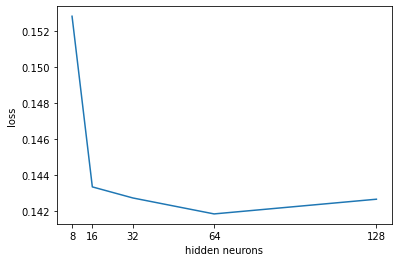

In [34]:
plt.xlabel("hidden neurons")
plt.ylabel("loss")
plt.xticks(np.array(hidden_n))
plt.plot(hidden_n,losses["rmsprop"])

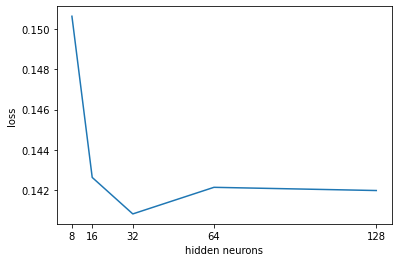

In [33]:

plt.xlabel("hidden neurons")
plt.ylabel("loss")
plt.xticks(np.array(hidden_n))
plt.plot(hidden_n,losses["adam"])

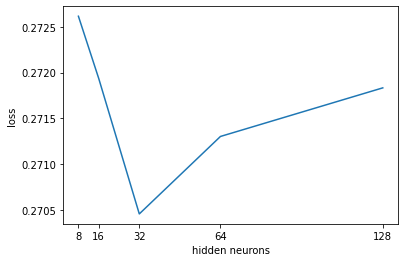

In [32]:

plt.xlabel("hidden neurons")
plt.ylabel("loss")
plt.xticks(np.array(hidden_n))
plt.plot(hidden_n,losses["sgd_mom"])

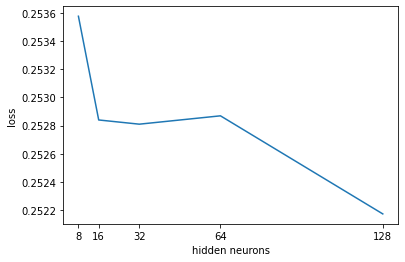

In [35]:

plt.xlabel("hidden neurons")
plt.ylabel("loss")
plt.xticks(np.array(hidden_n))
plt.plot(hidden_n,losses["sgd_with_mom"])

In [27]:
#### PCA 
nums = [16,32,64,128]
for num in nums:
  pca = PCA(num)
  pca.fit(X_train.reshape((-1,X_train.shape[1]*X_train.shape[2])))
  res = pca.transform(X_test.reshape((-1,X_test.shape[1]*X_test.shape[2])))
  X_test_new = pca.inverse_transform(res)
  X_test_new = X_test_new.reshape((-1,28,28))
  bce = keras.losses.BinaryCrossentropy()
  print("Reconstruction  Loss {} is : ".format(num),bce(X_test, X_test_new).numpy())

Reconstruction  Loss 16 is :  0.1482384353876114
Reconstruction  Loss 32 is :  0.11826471984386444
Reconstruction  Loss 64 is :  0.09526045620441437
Reconstruction  Loss 128 is :  0.08002723753452301
